In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1. The datasets: CIFAR-3**

In [2]:

X_gray=np.load('X_cifar_grayscale.npy')
y_gray = np.load('Y_cifar.npy')


In [3]:
np.shape(X_gray)

(18000, 32, 32)

In [4]:
nb_sample = 124


In [5]:
#la valeur minimale et la valeur maximale
valeur_min = np.min(X_gray, axis=(0, 1))
valeur_max = np.max(X_gray, axis=(0, 1))

print("max value is :", valeur_max)
print("min value is :", valeur_min)

max value is : [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255]
min value is : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


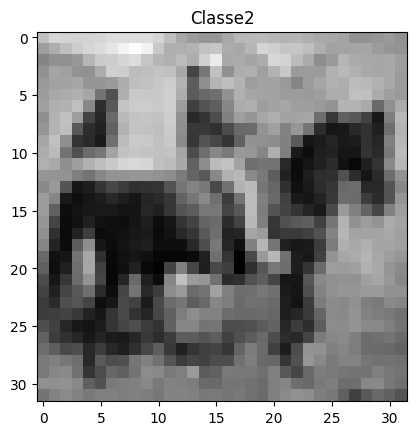

<Figure size 640x480 with 0 Axes>

In [6]:
plt.imshow(X_gray[nb_sample],cmap='gray')
img_title = 'Classe' + str(y_gray[nb_sample])
plt.title(img_title)
plt.show()
plt.clf()

In [7]:
#La normalisation
X_gray_normalized = X_gray / 255.0

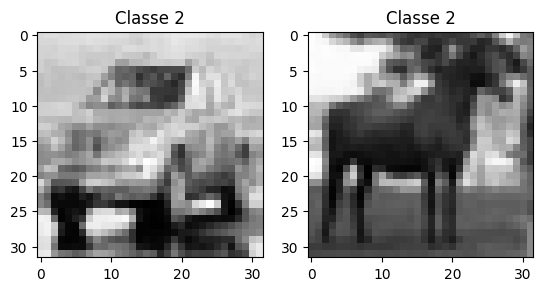

In [8]:


plt.subplot(1, 2, 1)
plt.imshow(X_gray_normalized[120], cmap='gray')
img_title = 'Classe ' + str(y_gray[nb_sample])
plt.title(img_title)

plt.subplot(1, 2, 2)
plt.imshow(X_gray_normalized[130], cmap='gray')
img_title = 'Classe ' + str(y_gray[nb_sample])
plt.title(img_title)

plt.show()


In [12]:
#repartition de notre data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_gray_normalized, y_gray, test_size = 0.3, random_state = 42)

In [13]:
#bombre de classes dans notre dataset
labels_uni = np.unique(y_gray)
number_labels = len(labels_uni)
print(number_labels)

3


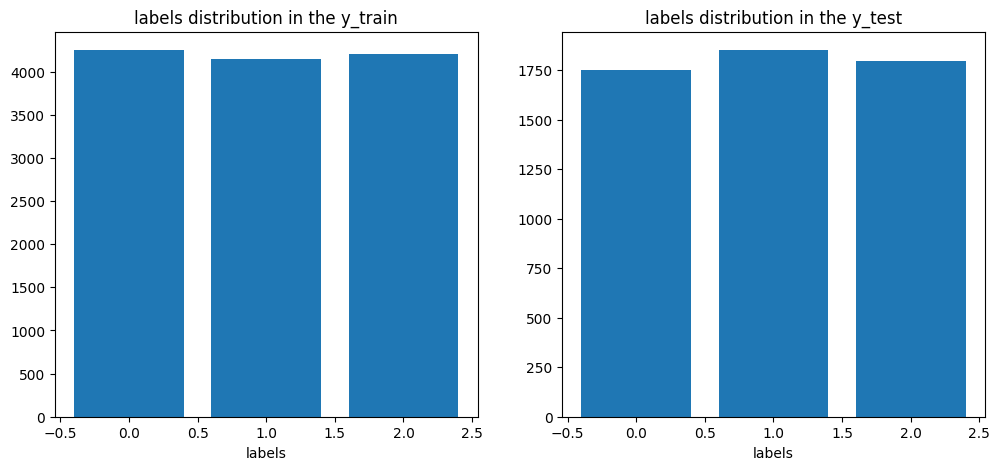

In [14]:
train_label_distribution = np.bincount(y_train)
test_label_distribution = np.bincount(y_test)

# Créer un graphique pour visualiser les distributions des trois classes dans le training et test date, @code ameliorer par CHATGPT@
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(range(len(train_label_distribution)), train_label_distribution)
ax1.set_title('labels distribution in the y_train')
ax1.set_xlabel('labels')

ax2.bar(range(len(test_label_distribution)), test_label_distribution)
ax2.set_title('labels distribution in the y_test')
ax2.set_xlabel('labels')


plt.show()


# **DIMENTIONALITY REDUCTION WITH THE PCA**



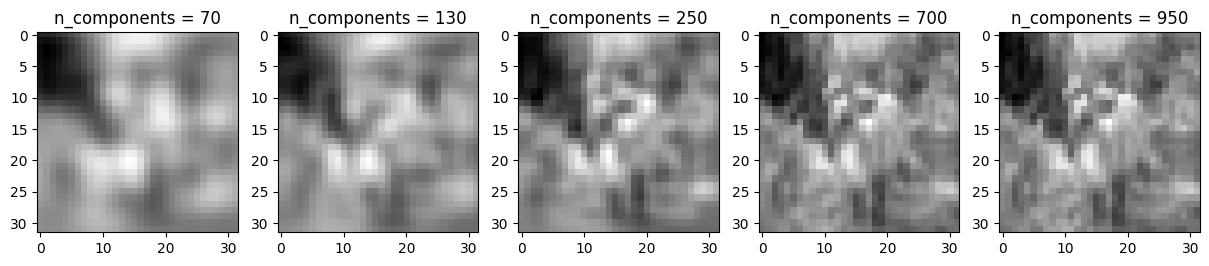

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


n_components_val = [70, 130, 250, 700, 950]


plt.figure(figsize=(15, 3))

for idx, i in enumerate(n_components_val, 1):

    pca = PCA(n_components=i)
    X_reshaped = np.reshape(X_gray, (18000, 32 * 32))
    pca.fit(X_reshaped)
    X_reduced = pca.transform(X_reshaped)
    X_reduced_img = pca.inverse_transform(X_reduced)

    nb_sample = 140

    img_reshaped = np.reshape(X_reduced_img[nb_sample], (32, 32))

    plt.subplot(1, len(n_components_val), idx)

    plt.imshow(img_reshaped, cmap='gray')
    img_title = 'Class ' + str(y_gray[nb_sample])
    plt.title(f'n_components = {i}')

plt.show()


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1024)
X_reshaped = np.reshape(X_gray,(18000,32*32))
pca.fit(X_reshaped)

PCA(n_components=1024)

In [17]:
print(pca.explained_variance_ratio_)

[2.82356419e-01 1.20829347e-01 7.55195364e-02 ... 7.77817131e-07
 7.00027664e-07 6.69533910e-07]


In [18]:
X_reduced = pca.transform(X_reshaped)

In [19]:
np.shape(X_reduced)

(18000, 1024)

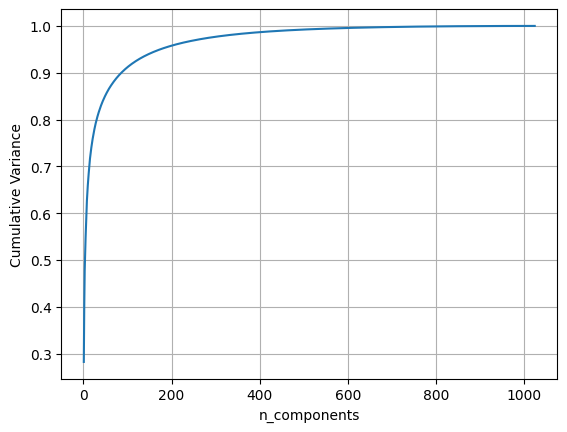

In [20]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) # calcule de la cumulative variance
ncomponents = len(cumulative_variance)

n_components = np.arange(1, ncomponents + 1)

plt.plot(n_components, cumulative_variance)
plt.xlabel('n_components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

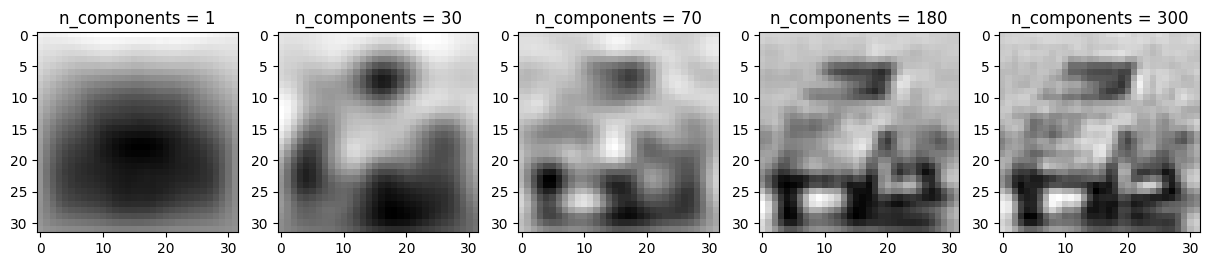

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


n_components_val = [1, 30, 70, 180, 300]


plt.figure(figsize=(15, 3))

for idx, i in enumerate(n_components_val, 1):

    pca = PCA(n_components=i)
    X_reshaped = np.reshape(X_gray, (18000, 32 * 32))
    pca.fit(X_reshaped)
    X_reduced = pca.transform(X_reshaped)
    X_reduced_img = pca.inverse_transform(X_reduced)

    nb_sample = 120

    img_reshaped = np.reshape(X_reduced_img[nb_sample], (32, 32))

    plt.subplot(1, len(n_components_val), idx)

    plt.imshow(img_reshaped, cmap='gray')
    img_title = 'Class ' + str(y_gray[nb_sample])
    plt.title(f'n_components = {i}')

plt.show()







# ***3.1. Logistic Regression & Gaussian Naïve Bayes Classifier***





In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_gray_normalized, y_gray, test_size = 0.25, random_state = 42)


#cela va nous servir pour le reshape
print(np.shape(X_train))
print(np.shape(X_test))



(13500, 32, 32)
(4500, 32, 32)


In [23]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()


X_train_reshaped = np.reshape(X_train,(13500,32*32)) #shape known using np.shape(X_train)

logistic_regression_model.fit(X_train_reshaped, y_train)

X_test_reshaped = np.reshape(X_test,(4500,32*32)) #shape known using np.shape(X_test)

y_predit_LR = logistic_regression_model.predict(X_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB


In [24]:
from sklearn.naive_bayes import GaussianNB

NBC_model = GaussianNB()

NBC_model.fit(X_train_reshaped, y_train)

y_pred_NBC = NBC_model.predict(X_test_reshaped)



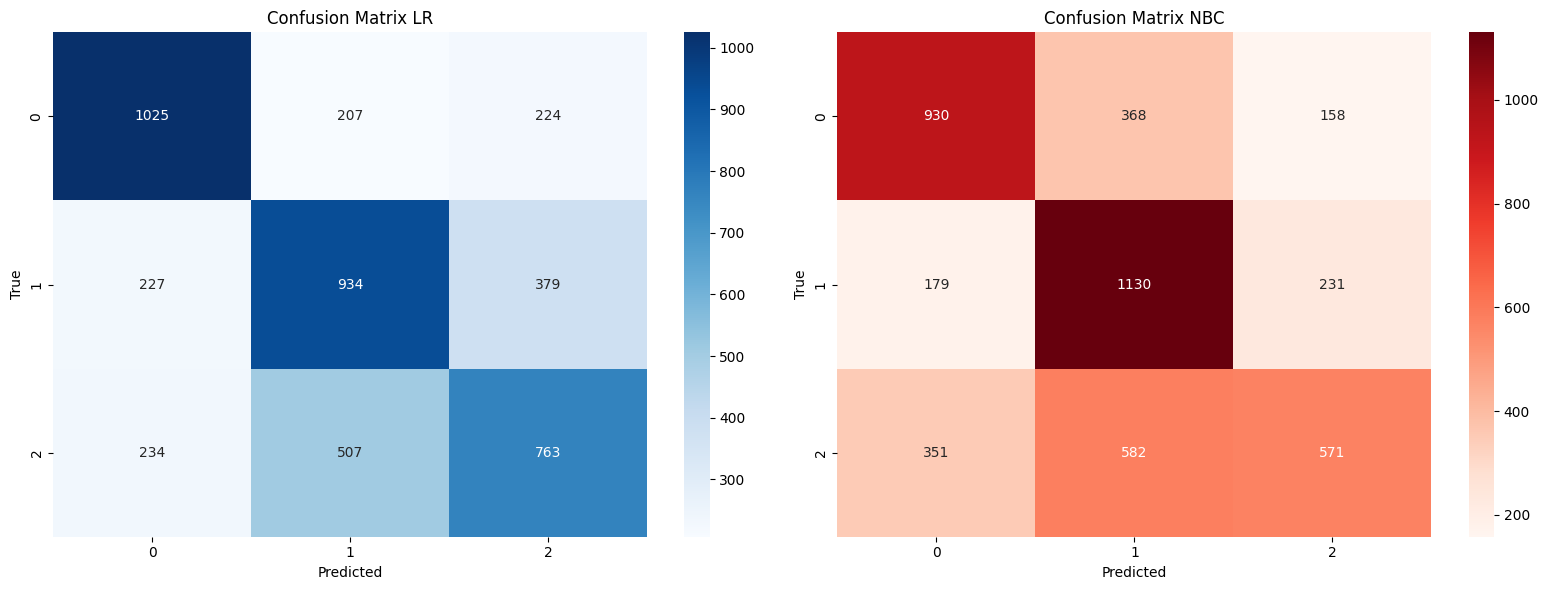

In [25]:
#code chatgpt pour l'affichage des deux plots

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_ma = confusion_matrix(y_test, y_predit_LR, labels=[0, 1, 2])


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot de la première matrice de confusion
sns.heatmap(conf_ma, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], ax=axes[0])
axes[0].set_title('Confusion Matrix LR')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

    # Calcul de la deuxième matrice de confusion (à remplacer par vos propres données)
conf_ma_2 = confusion_matrix(y_test, y_pred_NBC, labels=[0, 1, 2])

sns.heatmap(conf_ma_2, annot=True, fmt="d", cmap="Reds", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], ax=axes[1])
axes[1].set_title('Confusion Matrix NBC')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()

plt.show()

# Utilisation de la fonction avec vos données
# plot_confusion_matrix(y_true, y_pred, labels)





# **#  influence of parameters on results **

In [29]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model_2 = LogisticRegression(C=0.4, penalty='l2')


X_train_reshaped = np.reshape(X_train,(13500,32*32)) #shape known using np.shape(X_train)

logistic_regression_model_2.fit(X_train_reshaped, y_train)

X_test_reshaped = np.reshape(X_test,(4500,32*32)) #shape known using np.shape(X_test)

y_predit_LR_2 = logistic_regression_model_2.predict(X_test_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.naive_bayes import GaussianNB

NBC_model_2 = GaussianNB(var_smoothing=1e-9)

NBC_model_2.fit(X_train_reshaped, y_train)

y_pred_NBC_2 = NBC_model_2.predict(X_test_reshaped)

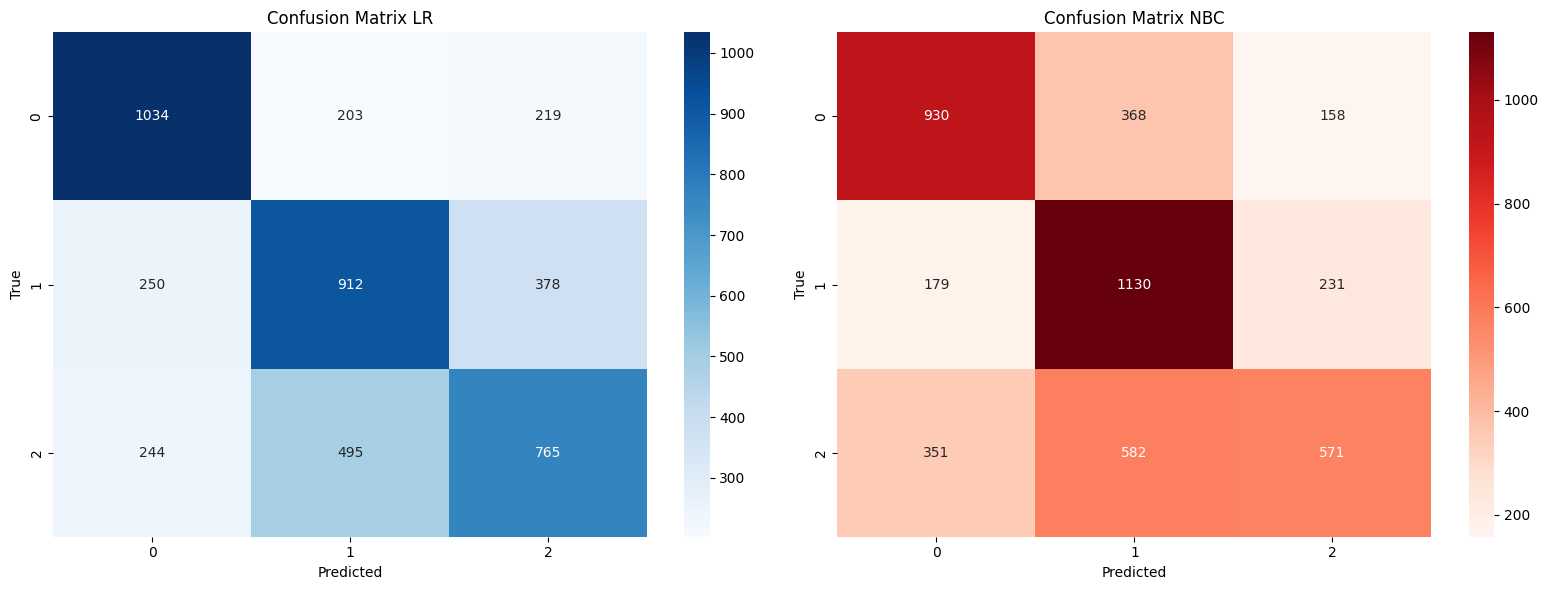

In [31]:
#code chatgpt pour l'affichage des deux plots

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#matrice de confusion pour le model LR
conf_ma = confusion_matrix(y_test, y_predit_LR_2, labels=[0, 1, 2])


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot de la première matrice de confusion
sns.heatmap(conf_ma, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], ax=axes[0])
axes[0].set_title('Confusion Matrix LR')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

#la deuxieme matrice de confusion pour le model NBC
conf_ma_2 = confusion_matrix(y_test, y_pred_NBC_2, labels=[0, 1, 2])

sns.heatmap(conf_ma_2, annot=True, fmt="d", cmap="Reds", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2], ax=axes[1])
axes[1].set_title('Confusion Matrix NBC')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()

plt.show()




# **Question 3 : the score method**


LR


In [32]:
#Model LR
accuracy_train = logistic_regression_model.score(X_train_reshaped, y_train)
accuracy_test = logistic_regression_model.score(X_test_reshaped, y_test)

print("Accuracy on the training set:", accuracy_train)
print("Accuracy on the test set:", accuracy_test)


Accuracy on the training set: 0.6421481481481481
Accuracy on the test set: 0.6048888888888889


NBC

In [33]:
#model NBC
accuracy_train = NBC_model.score(X_train_reshaped, y_train)
accuracy_test = NBC_model.score(X_test_reshaped, y_test)


print("Accuracy on the training set:", accuracy_train)
print("Accuracy on the test set:", accuracy_test)

Accuracy on the training set: 0.5862222222222222
Accuracy on the test set: 0.5846666666666667



# **Question 4 : With PCA**



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


pca = PCA(n_components=180)# our optimal value
X_reshaped = np.reshape(X_gray,(18000,32*32))
pca.fit(X_reshaped)
X_reduced_optim = pca.transform(X_reshaped)


#model LR avec PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced_optim, y_gray, test_size = 0.3, random_state = 42)

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train_pca, y_train_pca)

y_predit_LR = logistic_regression_model.predict(X_test_pca)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
#pour LR
accuracy_train = logistic_regression_model.score(X_train_pca, y_train_pca)
accuracy_test = logistic_regression_model.score(X_test_pca, y_test_pca)


print("Accuracy on the training set:", accuracy_train)
print("Accuracy on the test set:", accuracy_test)


Accuracy on the training set: 0.6256349206349207
Accuracy on the test set: 0.6090740740740741


In [53]:
from sklearn.naive_bayes import GaussianNB
# model NBC avec PC
nbc_model = GaussianNB()

nbc_model.fit(X_train_pca, y_train_pca)

y_pred_nbc = nbc_model.predict(X_test_pca)


In [54]:
#pour NBC
accuracy_train = nbc_model.score(X_train_pca, y_train_pca)
accuracy_test = nbc_model.score(X_test_pca, y_test_pca)

print("Accuracy on the training set:", accuracy_train)
print("Accuracy on the test set:", accuracy_test)

Accuracy on the training set: 0.6194444444444445
Accuracy on the test set: 0.6140740740740741



# **3.2. Deep Learning / MULTILAYER PERCEPTRON (MLP)**




# **First model **

(14400, 32, 32) (14400,) (14400, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 230)               235750    
                                                                 
 dense_1 (Dense)             (None, 3)                 693       
                                                                 
Total params: 236443 (923.61 KB)
Trainable params: 236443 (923.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
450/450 [==============================] - 4s 5ms/step - loss: 0.9160 - categorical_accuracy: 0.5854 - val_loss: 0.8296 - val_categorical_accuracy: 0.6464
Epoch 2/50
450/450 [==============================] - 2s 4ms/step - loss: 0.83

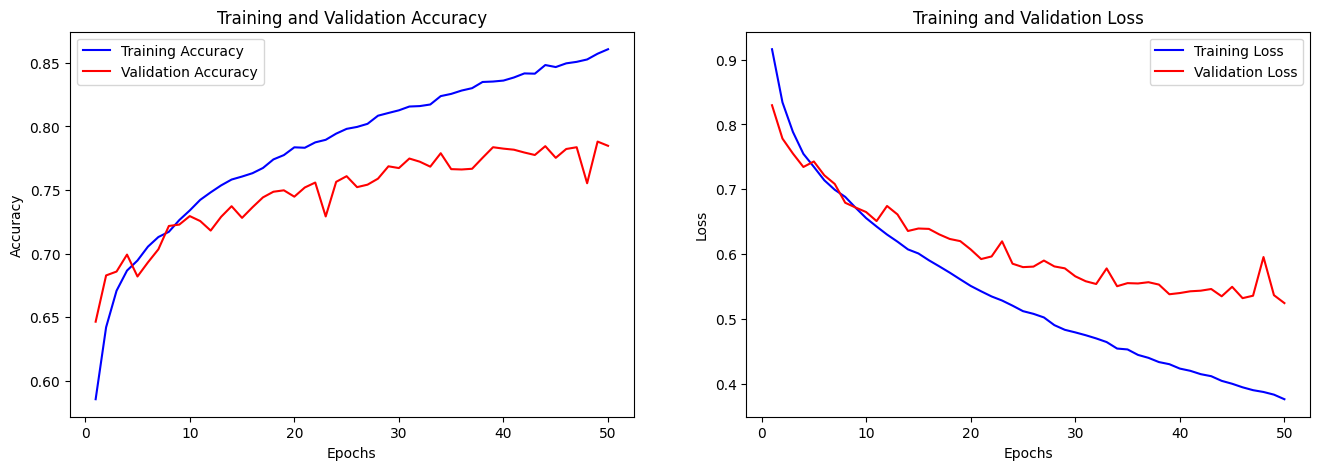

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))

#, ,kernel_regularizer=regularizers.l2(0.001) kernel_regularizer=regularizers.l2(0.001)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(230, activation='relu'), #une seule hidden layer de 230 neuronnes
  tf.keras.layers.Dense(3, activation='Softmax')
])



model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()


outputs = model.fit(X_train, Y_train,epochs=50,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])



# Assuming 'outputs' is the result from model.fit() and contains the training history
train_loss = outputs.history['loss']
val_loss = outputs.history['val_loss']
epochs = range(1, len(train_loss) + 1)
Train_acc = outputs.history['categorical_accuracy']
Val_acc = outputs.history['val_categorical_accuracy']

# Plotting the training and validation loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Tracer les courbes de précision
ax1.plot(epochs, Train_acc, label='Training Accuracy', color='blue')
ax1.plot(epochs, Val_acc, label='Validation Accuracy', color='red')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Tracer les courbes de perte
ax2.plot(epochs, train_loss, label='Training Loss', color='blue')
ax2.plot(epochs, val_loss, label='Validation Loss', color='red')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Afficher la figure
plt.show()

# **deuxieme model **

(14400, 32, 32) (14400,) (14400, 3)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 210)               215250    
                                                                 
 dropout_12 (Dropout)        (None, 210)               0         
                                                                 
 dense_21 (Dense)            (None, 140)               29540     
                                                                 
 dropout_13 (Dropout)        (None, 140)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                7050      
                                                                 
 dropout_14 (Dropo

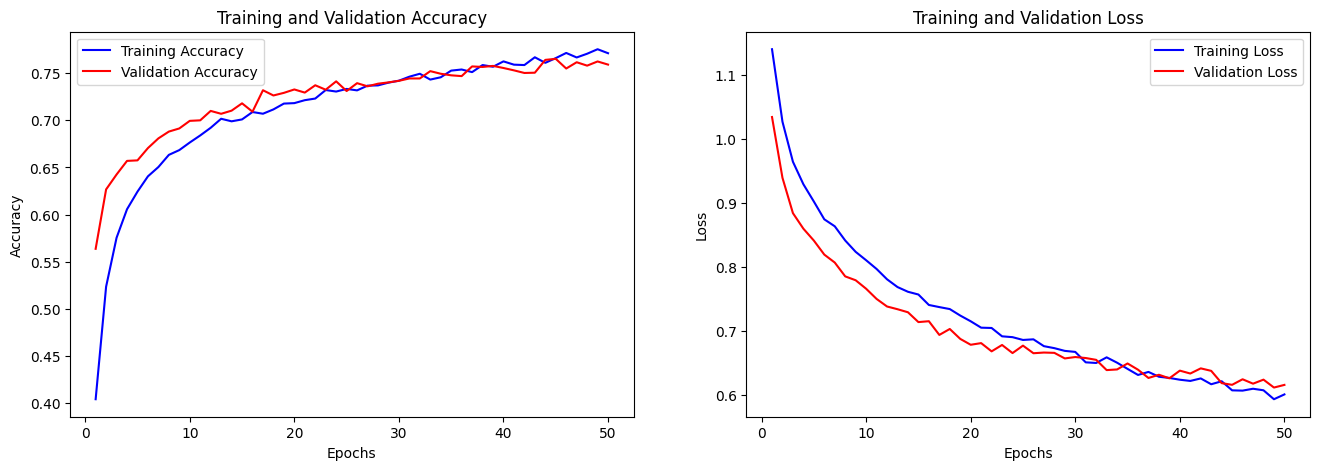

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X=np.load('X_cifar_grayscale.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))

#, ,kernel_regularizer=regularizers.l2(0.001) kernel_regularizer=regularizers.l2(0.001)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(210, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),# réseau de 210 neuronnes
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(140, activation='relu',kernel_regularizer=regularizers.l2(0.0001) ),# réseau de 140 neuronnes
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.0001) ),# réseau de 50 neuronnes
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3, activation='Softmax')
])



model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)

model.summary()


outputs = model.fit(X_train, Y_train,epochs=50, validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])



# Assuming 'outputs' is the result from model.fit() and contains the training history
train_loss = outputs.history['loss']
val_loss = outputs.history['val_loss']
epochs = range(1, len(train_loss) + 1)
Train_acc = outputs.history['categorical_accuracy']
Val_acc = outputs.history['val_categorical_accuracy']

# Plotting the training and validation loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Tracer les courbes de précision
ax1.plot(epochs, Train_acc, label='Training Accuracy', color='blue')
ax1.plot(epochs, Val_acc, label='Validation Accuracy', color='red')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Tracer les courbes de perte
ax2.plot(epochs, train_loss, label='Training Loss', color='blue')
ax2.plot(epochs, val_loss, label='Validation Loss', color='red')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Afficher la figure
plt.show()

In [36]:
labels_uni = np.unique(y_gray)
number_labels = len(labels_uni)
print(number_labels)

3



# **3.3. Deep Learning / CONVOLUTIONNAL NEURAL NETWORK (CNN)**


(14400, 32, 32, 3) (14400,) (14400, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten

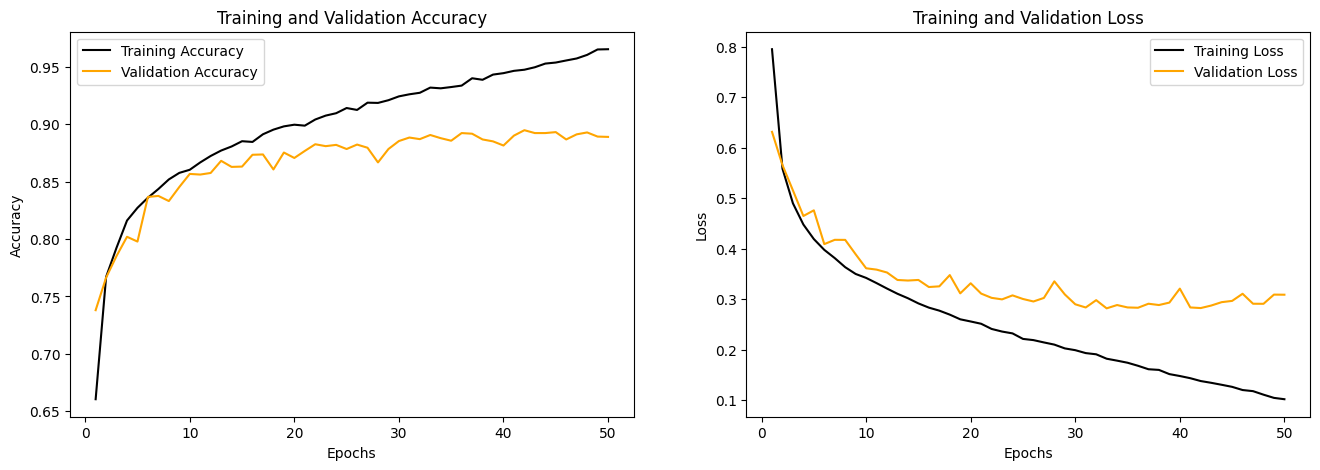

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

#model.add(layers.Dense(10, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes pour la classification


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)


model.summary()


outputs = model.fit(X_train, Y_train,epochs=50,validation_data=(X_test, Y_test))

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])



train_loss = outputs.history['loss']
val_loss = outputs.history['val_loss']
epochs = range(1, len(train_loss) + 1)
Train_acc = outputs.history['categorical_accuracy']
Val_acc = outputs.history['val_categorical_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

#la courbe accuracy
ax1.plot(epochs, Train_acc, label='Training Accuracy', color='black')
ax1.plot(epochs, Val_acc, label='Validation Accuracy', color='orange')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# la courbe loss
ax2.plot(epochs, train_loss, label='Training Loss', color='black')
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()


plt.show()

(14400, 32, 32, 3) (14400,) (14400, 3)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Fla

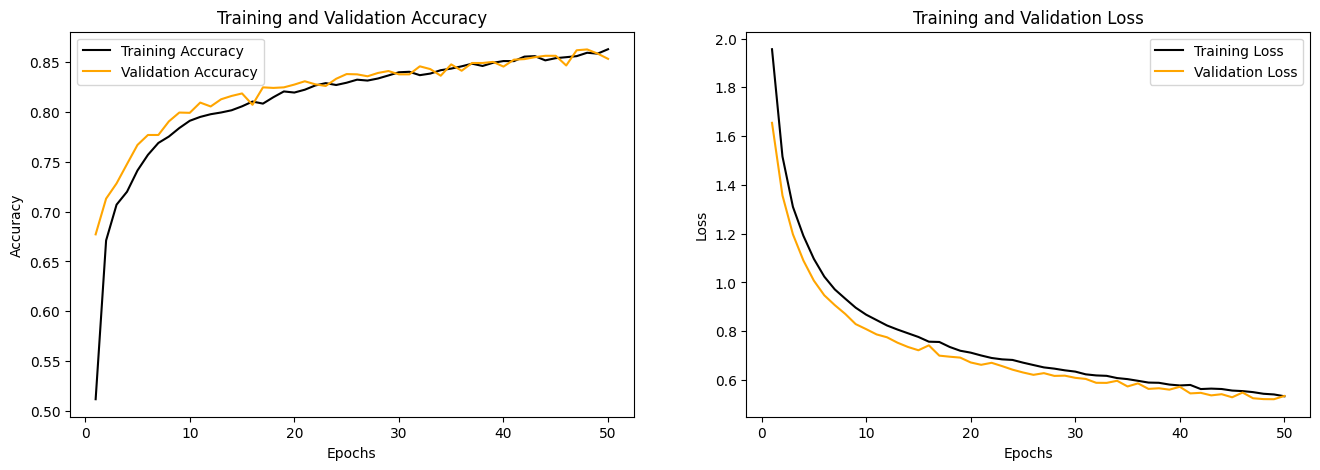

In [14]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

X=np.load('X_cifar.npy')
Y=np.load('Y_cifar.npy')

X_train, X_test, y_train, y_test = train_test_split(X/255., Y, test_size=0.2)

Y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

print(np.shape(X_train), np.shape(y_train), np.shape(Y_train))


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.55))
#model.add(layers.Dense(10, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))  # 3 classes pour la classification


model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)


model.summary()


outputs = model.fit(X_train, Y_train,epochs=50, batch_size=120,validation_data=(X_test, Y_test))#batch size de 120

print("Train_loss:", outputs.history['loss'])
print("Val_loss:", outputs.history['val_loss'])
print("Train_acc:", outputs.history['categorical_accuracy'])
print("Val_acc:", outputs.history['val_categorical_accuracy'])



train_loss = outputs.history['loss']
val_loss = outputs.history['val_loss']
epochs = range(1, len(train_loss) + 1)
Train_acc = outputs.history['categorical_accuracy']
Val_acc = outputs.history['val_categorical_accuracy']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

#la courbe accuracy
ax1.plot(epochs, Train_acc, label='Training Accuracy', color='black')
ax1.plot(epochs, Val_acc, label='Validation Accuracy', color='orange')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# la courbe loss
ax2.plot(epochs, train_loss, label='Training Loss', color='black')
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()


plt.show()
